In [1]:
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
#Loading the Dataframe from Feature_Extraction.ipynb
Data_ohe = pd.read_pickle("Data_ohe.pkl")
Data_tar_enc = pd.read_pickle("Data_tar_enc.pkl")
Attack_type = pd.read_pickle("Attack_type.pkl")

print(f"Data_ohe shape; ", Data_ohe.shape) 
print(f"Data_tar_enc shape; ", Data_tar_enc.shape) 

Data_ohe shape;  (157800, 55)
Data_tar_enc shape;  (157800, 36)


## Distribution of Label Features

The Number of Attack label is bigger than Normal label<br>
**Valid for Anamoly detection?**

Value Count:Attack_label
1.0    133499
0.0     24301
Name: count, dtype: int64,
Frequency:Attack_label
1.0    0.846001
0.0    0.153999
Name: proportion, dtype: float64


<Axes: ylabel='Frequency'>

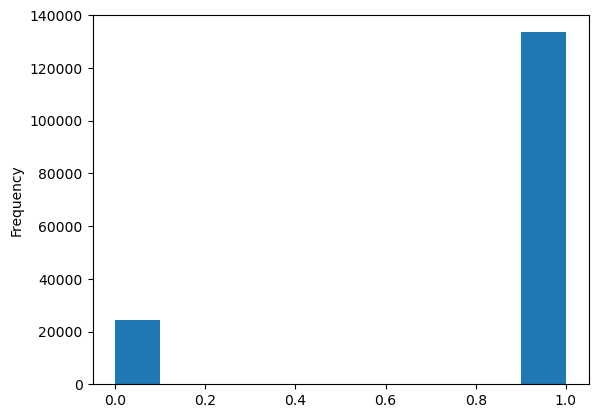

In [5]:
print(f"Value Count:{Data_ohe['Attack_label'].value_counts()},\nFrequency:{Data_ohe['Attack_label'].value_counts(normalize=True)}") # hier Data_ohe = Data_tar_enc
Data_ohe['Attack_label'].plot(kind= 'hist')

The Dataset seem to be valid for multiple clasification model.<br>  

['MITM' 'Fingerprinting' 'Ransomware' 'Uploading' 'SQL_injection'
 'DDoS_HTTP' 'DDoS_TCP' 'Password' 'Port_Scanning' 'Vulnerability_scanner'
 'Backdoor' 'XSS' 'Normal' 'DDoS_UDP' 'DDoS_ICMP']


<Axes: ylabel='Attack_type'>

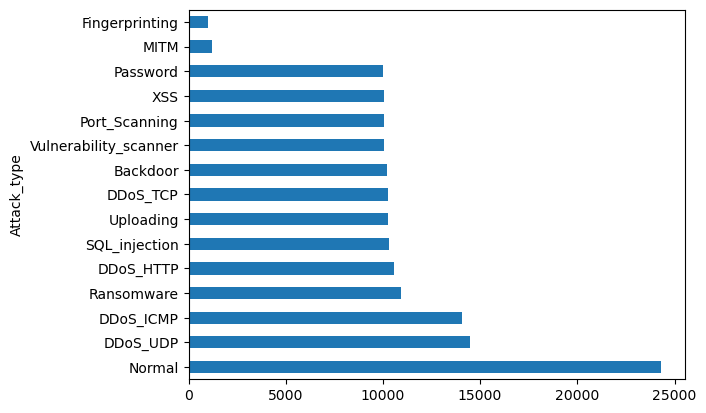

In [6]:
print(Attack_type.unique())
Attack_type.value_counts().plot.barh()

## Relationship Plot 
To explain the correlation between each Series/columns of Data a Heatmap is created.

<Axes: >

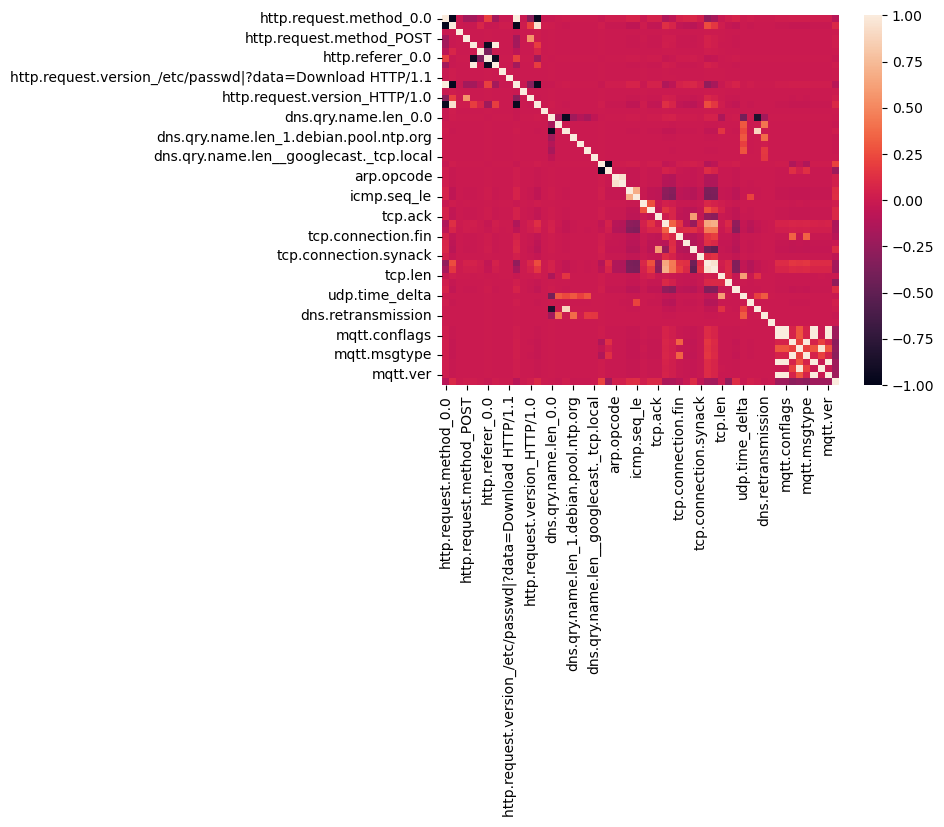

In [3]:
corr_Data_ohe = Data_ohe.corr(method="pearson") # the corr methods are ‘pearson’, ‘kendall’, ‘spearman’
sns.heatmap(corr_Data_ohe, annot=False)

<Axes: >

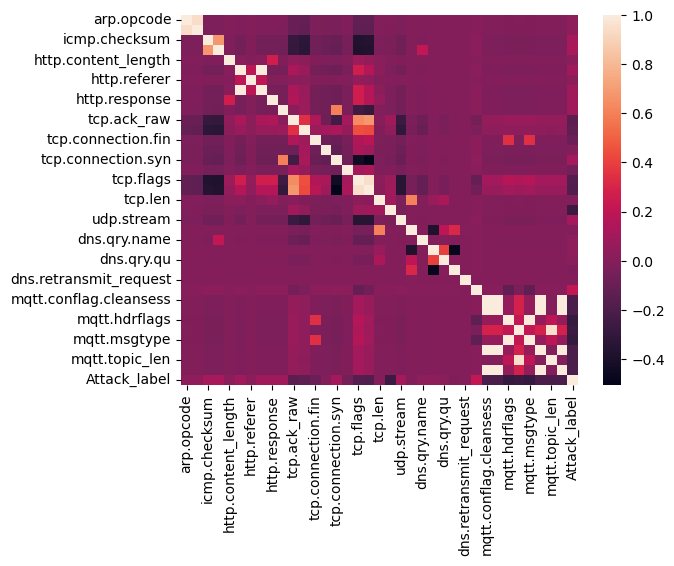

In [4]:
corr_Data_tar = Data_tar_enc.corr(method="pearson") # the corr methods are ‘pearson’, ‘kendall’, ‘spearman’
sns.heatmap(corr_Data_tar, annot=False)


***

## Embedded plot

In [10]:
Dataset_std = pd.read_pickle("Data_te_std.pkl")
Dataset_norm = pd.read_pickle("Data_te_norm.pkl")
Attack_label = pd.read_pickle("Attack_label.pkl")
Attack_type = pd.read_pickle("Attack_type.pkl")

# Working with smaller Dataset first
from sklearn.utils.random import sample_without_replacement
indices = sample_without_replacement(Dataset_std.shape[0], Dataset_std.shape[0]/8, random_state=22)
Dataset_std_short = pd.DataFrame(Dataset_std.loc[indices.tolist()])
Dataset_norm_short = pd.DataFrame(Dataset_norm.loc[indices.tolist()])
Attack_label_short = pd.DataFrame(Attack_label.loc[indices.tolist()])


# mapping the labels of Attack_type to 6 classes
mapping_dict = {'DDoS_UDP': 1, 'DDoS_ICMP': 1, 'DDoS_HTTP': 1, 'DDoS_TCP': 1,
                'Port_Scanning': 2, 'Fingerprinting': 2, 'Vulnerability_scanner': 2,
                'MITM' : 3, 'XSS' : 4, 'SQL_injection': 4, 'Uploading':4, 
                'Backdoor': 5, 'Password': 5, 'Ransomware':5, 'Normal':6}
temp = Attack_type.map(mapping_dict)
Attack_type_short = pd.DataFrame(temp.loc[indices.tolist()])


## standardised Dataset

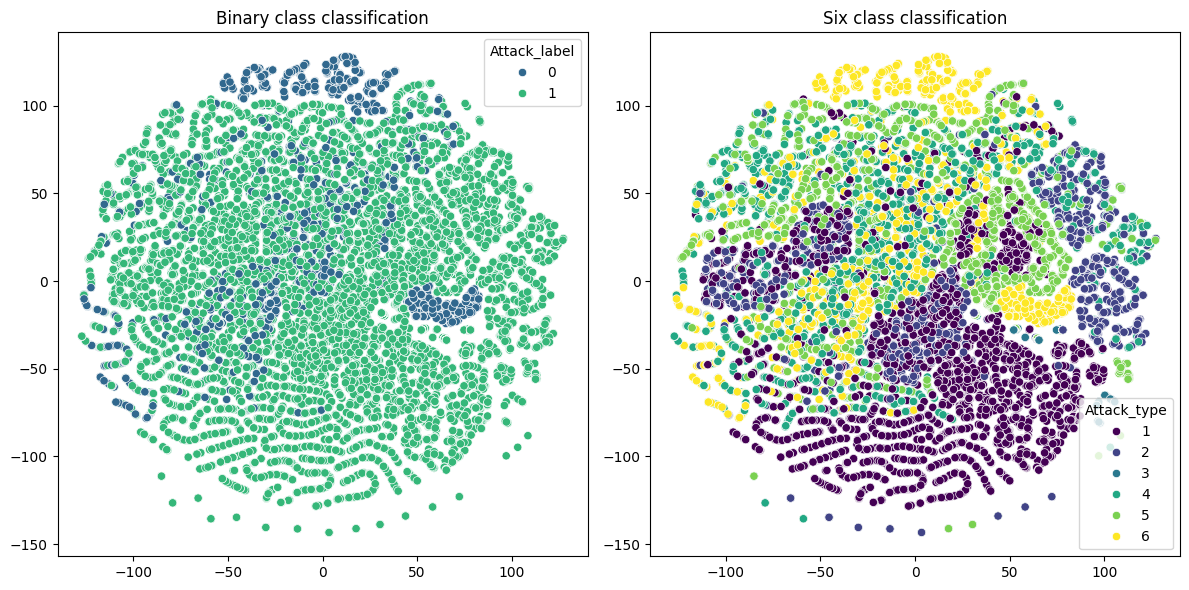

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
X_embedded_std = TSNE(n_components=2, learning_rate='auto', perplexity= 6).fit_transform(Dataset_std_short)

# visualising scatter plot for binary class and 6-class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
sns.scatterplot(x= X_embedded_std[:,0], y= X_embedded_std[:,1], hue=Attack_label_short['Attack_label'], palette='viridis', ax= ax1)
ax1.set_title('Binary class classification')

# Second scatter plot
sns.scatterplot(x= X_embedded_std[:,0], y= X_embedded_std[:,1], hue=Attack_type_short['Attack_type'], palette='viridis', ax= ax2)
ax2.set_title('Six class classification')

plt.tight_layout()
plt.show()

## normalised Dataset

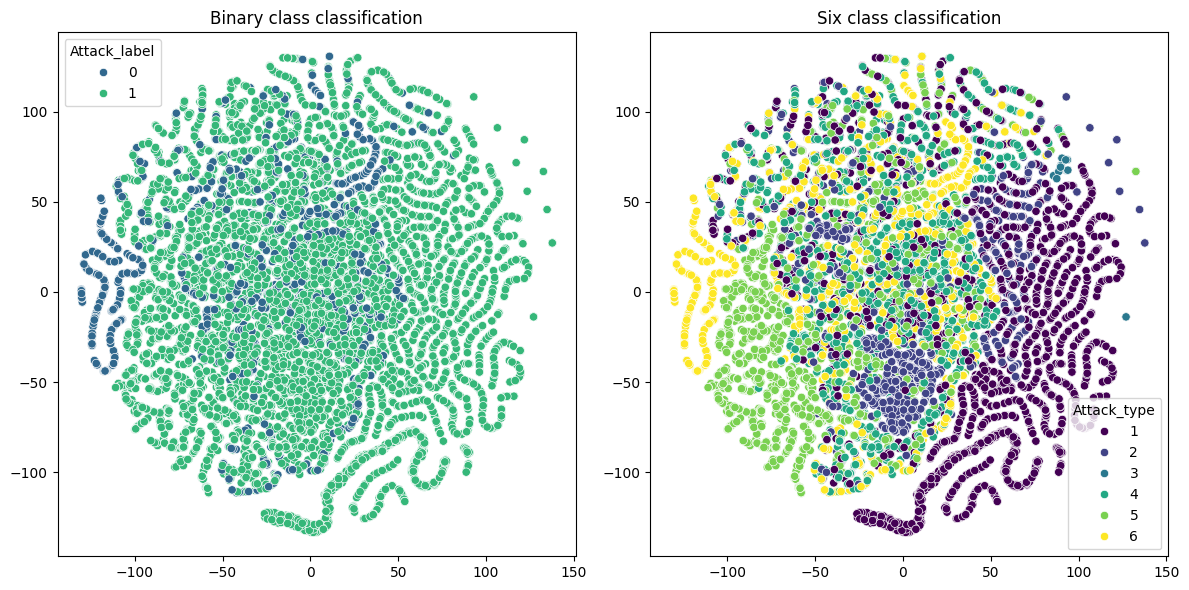

In [17]:
X_embedded_norm = TSNE(n_components=2, learning_rate='auto', perplexity=6).fit_transform(Dataset_norm_short)

# visualising scatter plot for binary class and 6-class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
sns.scatterplot(x= X_embedded_norm[:,0], y= X_embedded_norm[:,1], hue=Attack_label_short['Attack_label'], palette='viridis', ax= ax1)
ax1.set_title('Binary class classification')

# Second scatter plot
sns.scatterplot(x= X_embedded_norm[:,0], y= X_embedded_norm[:,1], hue=Attack_type_short['Attack_type'], palette='viridis', ax= ax2)
ax2.set_title('Six class classification')

plt.tight_layout()
plt.show()